In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#ewsize_garya_yesma
IMAGE_SIZE=[224,224]

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, zoom_range=0.2, horizontal_flip=True,rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,
    shear_range=0.2,)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/LFWdriveDatasets/train', target_size=(224,224),
                                                    batch_size=64,class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0,zoom_range=0.3,horizontal_flip=True,width_shift_range=0.1,)
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/LFWdriveDatasets/val', target_size=(224,224),
                                                              batch_size=64,class_mode='categorical')

Found 1899 images belonging to 162 classes.
Found 577 images belonging to 162 classes.


In [5]:
# #resize_garya_yesma
# IMAGE_SIZE=[224,224]

In [6]:
num_classes=len(glob('/content/drive/MyDrive/LFWdriveDatasets/train/*'))

In [7]:
#adding preprocessing layer to VGG16
vgg= VGG16(input_shape=IMAGE_SIZE+[3],
          weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
#don't training existing weights
for layer in vgg.layers:
    layer.trainable=False

In [9]:
#our layers
x=Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
prediction=Dense(num_classes,activation='softmax')(x)

In [10]:
#create a model object
model=Model(inputs=vgg.input,outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
import tensorflow as tf
# learning rate value
learning_rate = 0.0001

# Defining optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [14]:
# train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train', target_size=(224,224),
#                                                     batch_size=32)

# validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
# validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/datasets/val', target_size=(224,224),
#                                                               batch_size=32)

In [15]:
from tensorflow import keras
checkpoint_path="bestest_model.h5"
checkpoint= keras.callbacks.ModelCheckpoint(checkpoint_path,
                                           monitor='val_accuracy',
                                           verbose=1,
                                           save_best_only= True,
                                           mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=25)

In [16]:
cnn=model.fit(train_generator, epochs=250, validation_data=validation_generator,steps_per_epoch=len(train_generator),validation_steps=len(validation_generator),callbacks=[checkpoint,earlystopping])

Epoch 1/250
30/30 [==============================] - ETA: 0s - loss: 5.2221 - accuracy: 0.0079 
Epoch 1: val_accuracy improved from -inf to 0.01733, saving model to bestest_model.h5
30/30 [==============================] - 590s 19s/step - loss: 5.2221 - accuracy: 0.0079 - val_loss: 5.0160 - val_accuracy: 0.0173
Epoch 2/250
30/30 [==============================] - ETA: 0s - loss: 5.0284 - accuracy: 0.0195
Epoch 2: val_accuracy improved from 0.01733 to 0.03986, saving model to bestest_model.h5
30/30 [==============================] - 42s 1s/step - loss: 5.0284 - accuracy: 0.0195 - val_loss: 4.9540 - val_accuracy: 0.0399
Epoch 3/250
30/30 [==============================] - ETA: 0s - loss: 4.9670 - accuracy: 0.0232
Epoch 3: val_accuracy did not improve from 0.03986
30/30 [==============================] - 41s 1s/step - loss: 4.9670 - accuracy: 0.0232 - val_loss: 4.9148 - val_accuracy: 0.0225
Epoch 4/250
30/30 [==============================] - ETA: 0s - loss: 4.9117 - accuracy: 0.0358
Epoc

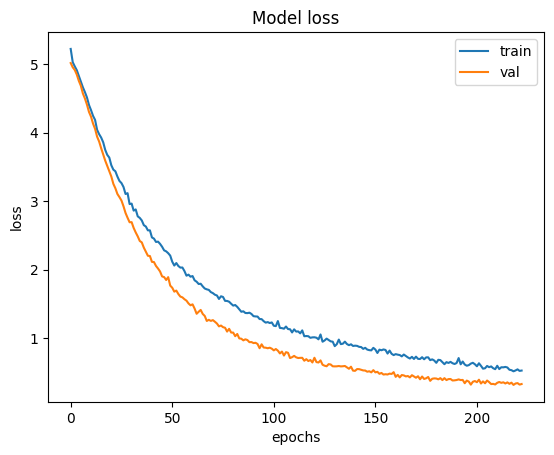

In [17]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'],loc='best')
plt.show()

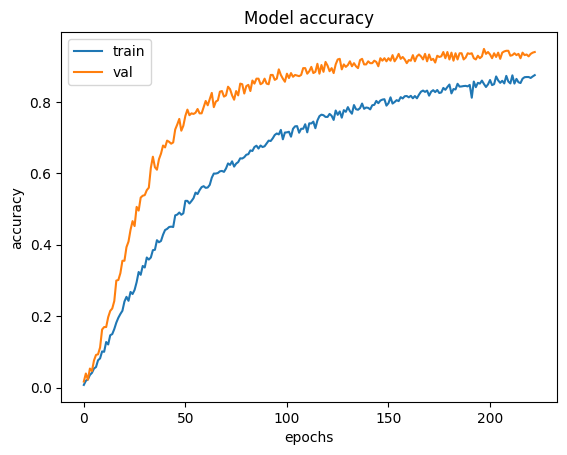

In [18]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='best')
plt.show()

In [19]:
# Saving the model to use it later on
fer_json=model.to_json()
with open('CriminalModel.json','w') as json_file:
    json_file.write(fer_json)
model.save_weights('CriminalModel.h5')

In [20]:
# loading json and creating model
from keras.models import model_from_json
json_file=open('CriminalModel.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('./CriminalModel.h5')
print('Loaded model from disk')

Loaded model from disk


In [21]:
from keras.optimizers import Adam
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
score=loaded_model.evaluate(train_generator,verbose=0)
print('%s: %.2f%%' %(loaded_model.metrics_names[1],score[1]*100))

accuracy: 98.37%


In [ ]:
from keras.optimizers import Adam
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
score=loaded_model.evaluate(validation_generator,verbose=0)
print('%s: %.2f%%' %(loaded_model.metrics_names[1],score[1]*100))

accuracy: 95.73%


In [22]:
from tensorflow.keras.optimizers import Adam

# Compile the loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Evaluate the loaded model on the test data
score = loaded_model.evaluate(validation_generator, verbose=0)

# Print the evaluation metrics
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1] * 100))


accuracy: 94.63%


In [23]:
from tensorflow.keras.models import load_model

# Load the model from the H5 file
model = load_model('bestest_model.h5')

# Compile the model (if needed)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluate the model on the test data
score = model.evaluate(validation_generator, verbose=0)

# Print the accuracy
print('Test accuracy:', score[1])


Test accuracy: 0.9358752369880676


10/10 [==============================] - 10s 1s/step


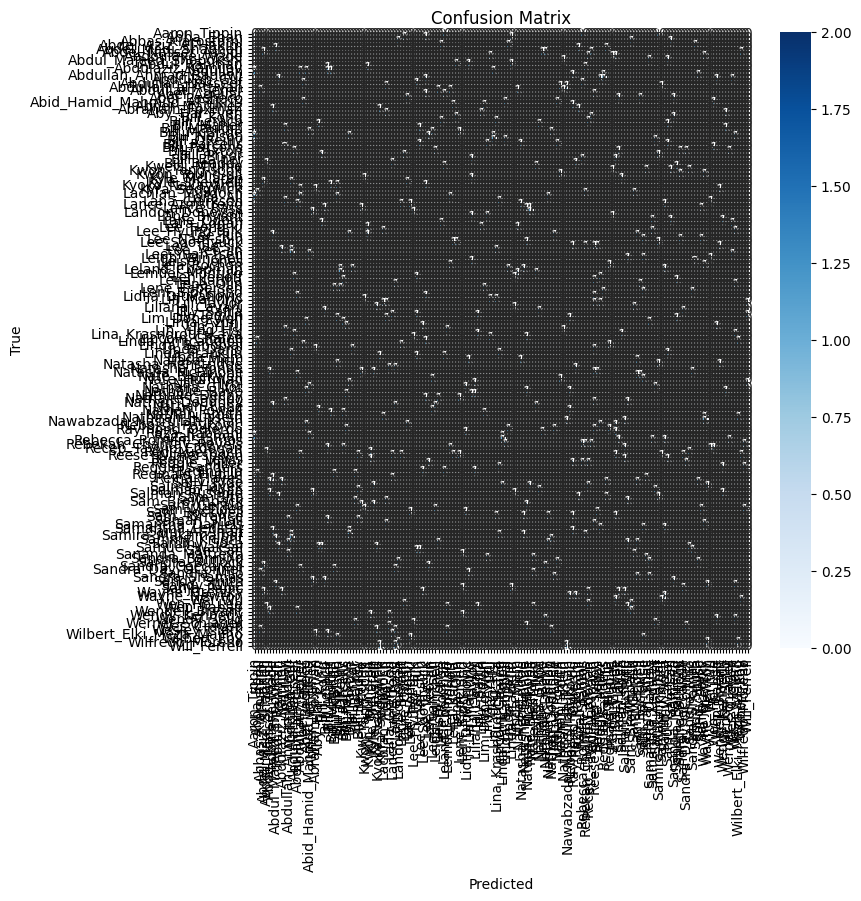

In [24]:
# Load the true labels and predicted labels
y_true = validation_generator.classes
y_pred = model.predict(validation_generator).argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
